<a href="https://colab.research.google.com/github/sarvan0506/AI/blob/Dev/Project%204/DNN_Optimized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

# install and import keras for neural network design and implementation

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

# import keras objects for Convolution and import the dataset

### Load pre-shuffled MNIST data into train and test sets

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# load the datset into train and test sets

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


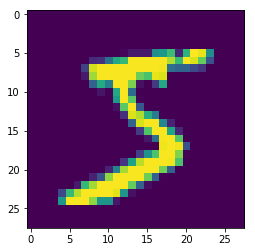

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

# plotting a sample as image to get a visual feel

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

# reshaping the dataset to Convolution format, X_train.shape[0] --> # of images, (28, 28) --> input image resolution, 1 - # of channels(the image itself).

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# converting the values into greyscale values.

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Now we are going to optimize the network step by step to achieve max validation accuracy with less no. of parameters

# Iteration 1: Network with less than 15k parameters

In [53]:

from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) # output 26
model.add(Convolution2D(16, 3, 3, activation='relu'))  # output 24
model.add(Convolution2D(16, 3, 3, activation='relu')) # output 22

model.add(MaxPooling2D(pool_size=(2,2))) # output 11
model.add(Convolution2D(11, 1, activation='relu')) # output 11

model.add(Convolution2D(16, 3, 3, activation='relu')) # output 9
model.add(Convolution2D(16, 3, 3, activation='relu')) # output 7


model.add(Convolution2D(7, 1, activation='relu')) # output 7
model.add(Convolution2D(10, 7))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  del sys.path[0]


In [54]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_82 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 22, 22, 16)        2320      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 11, 11, 11)        187       
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 9, 9, 16)          1600      
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 7, 7, 16)          2320      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# determining model evaluation metrics

In [56]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1, validation_data=(X_test, Y_test))

# training

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 224us/step - loss: 0.1903 - acc: 0.9428 - val_loss: 0.0633 - val_acc: 0.9809
Epoch 2/20
60000/60000 [==============================] - 12s 198us/step - loss: 0.0714 - acc: 0.9785 - val_loss: 0.0537 - val_acc: 0.9828
Epoch 3/20
60000/60000 [==============================] - 12s 197us/step - loss: 0.0548 - acc: 0.9829 - val_loss: 0.0467 - val_acc: 0.9849
Epoch 4/20
60000/60000 [==============================] - 12s 194us/step - loss: 0.0465 - acc: 0.9861 - val_loss: 0.0466 - val_acc: 0.9844
Epoch 5/20
60000/60000 [==============================] - 12s 196us/step - loss: 0.0407 - acc: 0.9869 - val_loss: 0.0348 - val_acc: 0.9887
Epoch 6/20
60000/60000 [==============================] - 12s 195us/step - loss: 0.0353 - acc: 0.9889 - val_loss: 0.0326 - val_acc: 0.9892
Epoch 7/20
60000/60000 [==============================] - 12s 196us/step - loss: 0.0323 - acc: 0.9901 - val_loss: 0.

## Inference
The model is performing good but doesn't reach 99.4% of validation accuracy, There is a significant gap between the training and validation accuracy which is a sign of over-fitting. We can add BN, Dropout etc step-by-step to reduce over-fitting and improve on this model.

# Iteration 2: Adding Batch Normalization and Dropout

In [57]:

from keras.layers import Activation
model = Sequential()


model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu')) # output 22
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2,2))) # output 11
model.add(Convolution2D(11, 1, activation='relu')) # output 11

model.add(Convolution2D(16, 3, 3, activation='relu')) # output 9
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu')) # output 7
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(7, 1, activation='relu')) # output 7
model.add(Convolution2D(10, 7))

model.add(Flatten())
model.add(Activation('softmax'))
          
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_90 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_6 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_6 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_7 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 22, 22, 16)        2320      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`


In [58]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# determining model evaluation metrics

model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1, validation_data=(X_test, Y_test))

# training

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 22s 373us/step - loss: 0.2041 - acc: 0.9354 - val_loss: 0.0505 - val_acc: 0.9827
Epoch 2/20
60000/60000 [==============================] - 20s 334us/step - loss: 0.0649 - acc: 0.9792 - val_loss: 0.0386 - val_acc: 0.9866
Epoch 3/20
60000/60000 [==============================] - 20s 332us/step - loss: 0.0518 - acc: 0.9839 - val_loss: 0.0403 - val_acc: 0.9878
Epoch 4/20
60000/60000 [==============================] - 20s 332us/step - loss: 0.0453 - acc: 0.9854 - val_loss: 0.0324 - val_acc: 0.9896
Epoch 5/20
60000/60000 [==============================] - 20s 334us/step - loss: 0.0409 - acc: 0.9872 - val_loss: 0.0310 - val_acc: 0.9904
Epoch 6/20
60000/60000 [==============================] - 20s 330us/step - loss: 0.0364 - acc: 0.9886 - val_loss: 0.0257 - val_acc: 0.9908
Epoch 7/20
60000/60000 [==============================] - 20s 331us/step - loss: 0.0333 - acc: 0.9895 - val_loss: 0.

## Inference
Now we can see the over-fitting is reduced with the help of BN and Dropout. But we have not still reached the target accuracy. Let us try using dynamic learning rate and increase the dropout rate a liitle bit as there is still some over-fitting issue.

# Iteration 3: Adding dynamic learning rate

In [71]:
from keras.layers import Activation
model = Sequential()


model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Convolution2D(16, 3, 3, activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Convolution2D(16, 3, 3, activation='relu')) # output 22
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(MaxPooling2D(pool_size=(2,2))) # output 11
model.add(Convolution2D(11, 1, activation='relu')) # output 11

model.add(Convolution2D(16, 3, 3, activation='relu')) # output 9
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Convolution2D(16, 3, 3, activation='relu')) # output 7
model.add(BatchNormalization())
model.add(Dropout(0.15))


model.add(Convolution2D(7, 1, activation='relu')) # output 7
model.add(Convolution2D(10, 7))

model.add(Flatten())
model.add(Activation('softmax'))
          
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_122 (Conv2D)          (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_26 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_26 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_123 (Conv2D)          (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_27 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_27 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 22, 22, 16)        2320      
__________

In [68]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 25s 410us/step - loss: 0.1680 - acc: 0.9468 - val_loss: 0.0600 - val_acc: 0.9804
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 20s 336us/step - loss: 0.0655 - acc: 0.9794 - val_loss: 0.0433 - val_acc: 0.9855
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 20s 333us/step - loss: 0.0523 - acc: 0.9835 - val_loss: 0.0968 - val_acc: 0.9695
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 20s 329us/step - loss: 0.0437 - acc: 0.9870 - val_loss: 0.0267 - val_acc: 0.9923
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==

## Inference
The accuracy is now very close to our target. Now we will increase the batch size and see if we can achieve the target.

# Iteration 4: Increasing Batch Size

In [72]:
from keras.layers import Activation
model = Sequential()


model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Convolution2D(16, 3, 3, activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Convolution2D(16, 3, 3, activation='relu')) # output 22
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(MaxPooling2D(pool_size=(2,2))) # output 11
model.add(Convolution2D(11, 1, activation='relu')) # output 11

model.add(Convolution2D(16, 3, 3, activation='relu')) # output 9
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Convolution2D(16, 3, 3, activation='relu')) # output 7
model.add(BatchNormalization())
model.add(Dropout(0.15))


model.add(Convolution2D(7, 1, activation='relu')) # output 7
model.add(Convolution2D(10, 7))

model.add(Flatten())
model.add(Activation('softmax'))
          
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_130 (Conv2D)          (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_31 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_31 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_32 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_32 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_132 (Conv2D)          (None, 22, 22, 16)        2320      
__________

In [76]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 11s 191us/step - loss: 0.0323 - acc: 0.9893 - val_loss: 0.0280 - val_acc: 0.9911
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 6s 105us/step - loss: 0.0264 - acc: 0.9914 - val_loss: 0.0268 - val_acc: 0.9924
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 6s 105us/step - loss: 0.0232 - acc: 0.9926 - val_loss: 0.0248 - val_acc: 0.9927
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 6s 106us/step - loss: 0.0199 - acc: 0.9936 - val_loss: 0.0225 - val_acc: 0.9928
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [=====

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

# validation score on test data

In [79]:
print(score)

[0.020153841206946528, 0.9945]


## Inference
Now we are able to achieve the validation accuracy of 99.43% at the 15th epoch, this model is able perform very good in-terms of validation accuracy and has only around ~12k paramters

In [0]:
y_pred = model.predict(X_test)

In [81]:
print(y_pred[:9])
print(y_test[:9])

# As we can see below the number indicating the class in each of the arrays listed below, is close to 1 and all the other numbers are far less than that

[[3.9698393e-15 6.7782857e-10 1.6475249e-07 1.1916333e-06 1.0738651e-16
  1.1857919e-11 1.3734541e-21 9.9999869e-01 1.8773664e-15 2.9348298e-11]
 [2.9721283e-09 1.0249179e-07 9.9999988e-01 2.9843156e-11 9.1723379e-11
  9.7138519e-13 4.0947114e-08 9.5490347e-13 4.0707052e-11 1.2695279e-12]
 [6.0045783e-12 9.9999833e-01 2.6390487e-07 9.6428963e-09 2.6385361e-08
  3.6833811e-08 2.9401375e-09 1.3873964e-06 1.3563564e-08 2.1557933e-10]
 [9.9999917e-01 7.1562710e-17 8.0087426e-10 2.8677864e-11 4.2069594e-11
  1.4833869e-08 2.8769415e-07 5.0200612e-12 4.2471041e-10 5.1243461e-07]
 [6.6160734e-14 4.0008396e-13 3.0173520e-11 1.0872198e-15 9.9999809e-01
  1.8131473e-15 1.4212305e-10 1.3057333e-09 2.4110268e-11 1.9049063e-06]
 [3.8365470e-12 9.9999905e-01 4.7741135e-08 1.2498179e-09 4.9063448e-08
  6.8025239e-09 1.6854714e-09 8.4592040e-07 1.6670525e-09 9.2123933e-11]
 [2.7879544e-18 3.0043142e-11 9.7748525e-11 1.2373911e-13 9.9999917e-01
  1.7943837e-13 1.6106924e-16 1.3091711e-09 1.9025508e-07 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

# Storing model architecture to a dictionary

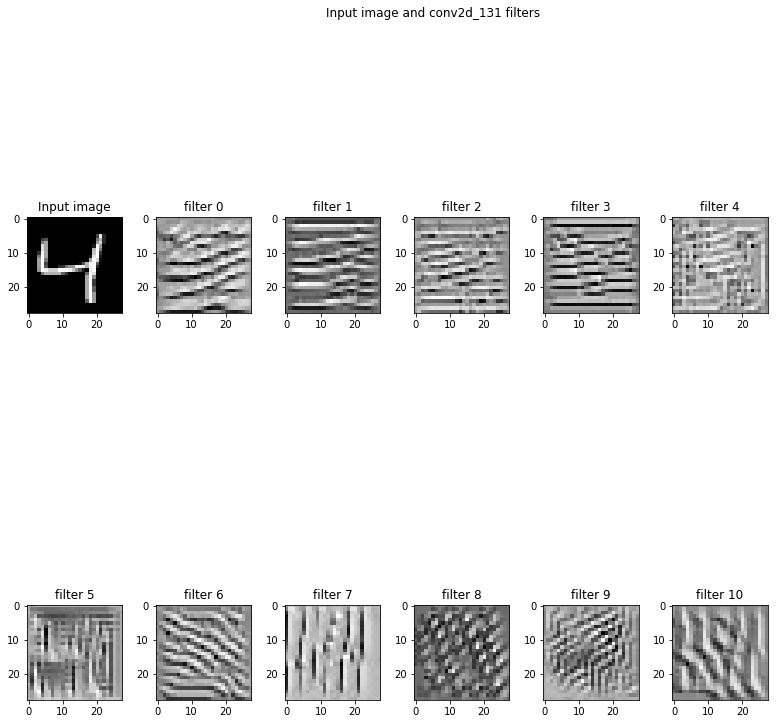

In [84]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_131'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()